# About Handwritten Digit Recognition

Welcome to a Python project focusing on recognizing handwritten digits using machine learning algorithms. Handwritten digit recognition is a pivotal challenge in computer vision, boasting a wide array of practical applications, including digitizing documents, recognizing zip codes in postal addresses, and authenticating bank checks. Throughout this project, we will leverage the Python programming language and key libraries such as NumPy, pandas, and tensorflow to craft a model proficient in accurately identifying handwritten digits.

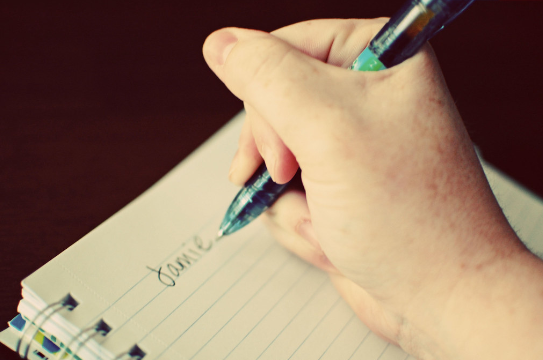

# About the Project

The endeavor will encompass various phases, namely preprocessing the data, constructing a neural network, training the model, and assessing its efficacy. We will utilize the renowned MNIST dataset, renowned for its extensive compilation of handwritten digit images and corresponding labels. Our ambition is to engineer a model that excels in deciphering the digits depicted in these images with remarkable precision.

In our journey, we will delve into the realm of advanced machine learning techniques and algorithms.

Begin by importing the necessary data for your upcoming analysis.

Utilize the fetch_openml function from the sklearn.datasets module, a component of the widely used scikit-learn library for machine learning in Python, to access and retrieve datasets from the OpenML repository. Specifically, for this task, it's employed to acquire the MNIST dataset, a renowned collection of handwritten digits frequently employed in image classification challenges.

In [1]:
# Import the fetch_openml function from sklearn.datasets to access open datasets
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset
mnist = fetch_openml("mnist_784", version=1, as_frame=False, parser='auto')

# Convert the target labels from strings to integers
mnist.target = mnist.target.astype(int)

Our dataset consists of various rows, each depicting pixel values on a grey scale ranging from 0 to 255. Let's display a few of these images.

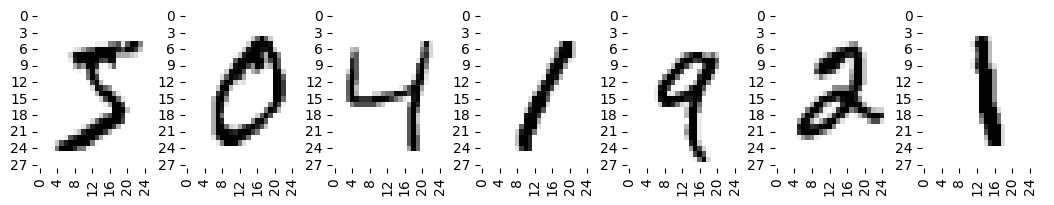

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the feature data (images) from the MNIST dataset
X = mnist['data']

# Create a subplot of 1 row and 7 columns
f, ax = plt.subplots(1, 7, figsize=(13, 2))

# Loop through the first 7 images in the dataset
for n in range(7):
    # Use seaborn's heatmap function to visualize each image
    sns.heatmap(X[n].reshape(28, 28), cbar=False, cmap='gray_r', ax=ax[n])

Ensuring class balance in machine learning datasets is crucial for avoiding model bias towards any specific class. When a dataset is balanced, it signifies an equitable representation of all classes, which is vital. An imbalanced dataset can result in suboptimal performance of the model, especially in predicting the minority class.

Consider a dataset comprising customer transactions where 90% are legitimate and only 10% fraudulent. Training a model on such skewed data might incline it to predict most transactions as legitimate. This inclination occurs because the model is tailored to reduce overall error, and identifying most transactions as legitimate boosts accuracy, albeit superficially.

Hence, maintaining class balance is imperative for training models on a diverse sample from each class, enhancing their ability to make precise predictions across the board.

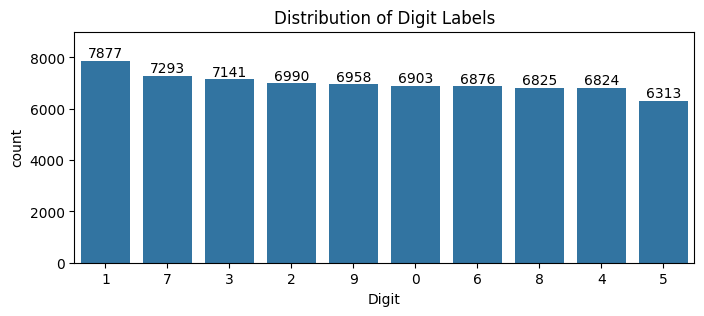

In [3]:
import pandas as pd

# Extract the target labels (digit values) from the MNIST dataset
Y = mnist['target']

# Create a figure and axis with specific size for plotting the digit label distribution
f, ax = plt.subplots(figsize=(8, 3))
plt.title('Distribution of Digit Labels')

# Plot a count plot of digit frequencies
sns.countplot(x=Y, order=pd.Series(Y).value_counts().index)

# Annotate bars with the count of each digit label
ax.bar_label(container=ax.containers[0])

# Set the y-axis limit and label the x-axis
ax.set(ylim=[0, 9000], xlabel='Digit')
plt.show()

How is the distribution of category records within the data matrix?

It's crucial to ascertain if the data entries linked to a specific category are randomly scattered across row indices or if they exhibit any form of clustering.

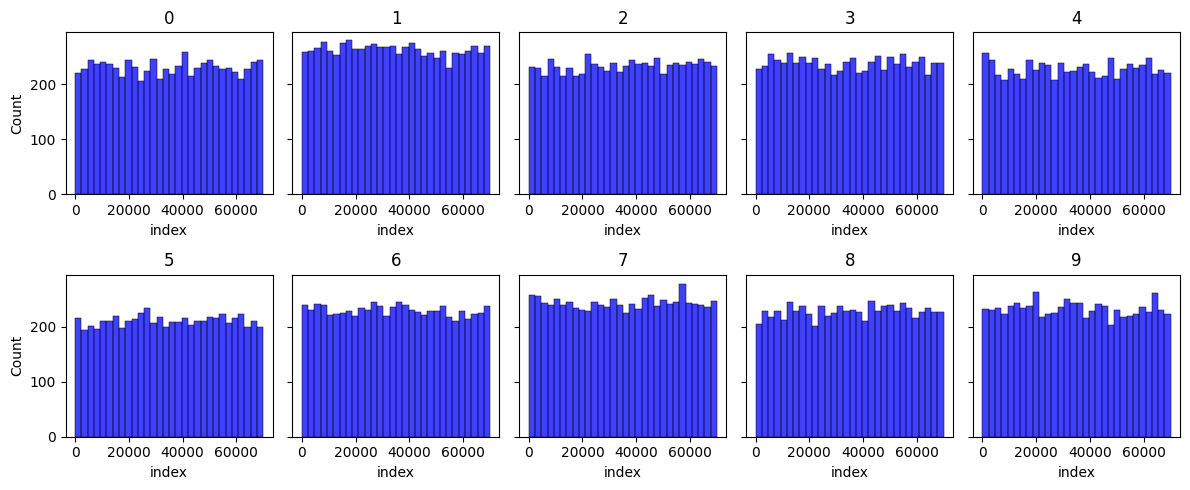

In [4]:
import numpy as np

# Create a 2x5 subplot grid, specify figure size, enable tight layout, and share the y-axis across subplots
f, ax = plt.subplots(2, 5, figsize=(12, 5), tight_layout=True, sharey=True)

# Iterate through digits 0-9 to plot their indices' distribution histograms on the subplots
for digit in range(10):
    # Configure subplot title and xlabel; plot histogram for each digit's occurrence
    sns.histplot(np.where(Y == digit)[0], bins=30, ax=ax[digit // 5, digit % 5], color='b').set(title=digit, xlabel='index')

In Python, the train_test_split function, part of the sklearn.model_selection module, is frequently utilized for dividing a dataset into two parts: a training subset and a testing subset.

This train_test_split() function performs a random partitioning of the dataset into these subsets, determined by a predefined test size or train size.

In [5]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X[:1000], Y[:1000], test_size=1/7)

# Print the resulting shapes and sizes
print('TRAIN Feature matrix shape:', X_train.shape)
print('TRAIN Target vector size:', y_train.size)
print('TEST Feature matrix shape:', X_test.shape)
print('TEST Target vector size:', y_test.size)

TRAIN Feature matrix shape: (857, 784)
TRAIN Target vector size: 857
TEST Feature matrix shape: (143, 784)
TEST Target vector size: 143


# KNN

The K-Nearest Neighbors (KNN) algorithm, a supervised machine learning technique, is predominantly utilized for classification. This algorithm operates by classifying a new data point according to the categories of its closest neighbors within the training dataset.

In the context of classification, the KNN classifier designates a class to a new data point by identifying the 'k' nearest neighbors in the training set, with 'k' being a user-defined parameter. The classification of the new data point is then determined by a majority vote among these 'k' nearest neighbors.

Despite its simplicity and adaptability, the KNN algorithm is computationally intensive for extensive datasets. It necessitates a meticulous selection of both the 'k' value and the distance metric. Nonetheless, KNN remains a widely employed and effective tool for classification tasks in the realm of machine learning.

Predicted classes: [6 1 1 2 4 1 8 6 8 8 7 0 2 7 1 0 1 4 9 1 4 1 9 6 7 9 4 5 3 1 8 7 9 0 3 0 0
 9 1 1 2 1 3 3 3 5 4 5 1 8 3 9 0 8 8 1 2 6 4 3 9 1 7 5 6 7 5 9 1 6 3 1 6 1
 5 6 2 2 1 7 3 2 2 1 9 3 5 5 3 0 1 0 1 0 1 9 1 8 5 6 0 2 1 2 5 6 9 3 7 3 4
 6 6 9 1 8 2 0 5 3 1 4 3 8 0 5 8 9 8 2 4 3 4 7 5 7 4 5 3 7 0 1 1]


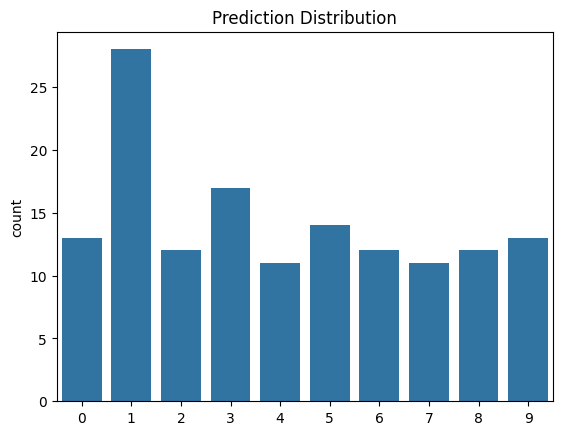

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors classifier with 4 neighbors
classifier_1 = KNeighborsClassifier(n_neighbors=4)

# Train the classifier using the training data and corresponding labels
classifier_1.fit(X_train, y_train)

# Use the trained classifier to predict the classes for the test set
Y_pred = classifier_1.predict(X_test)

# Print the predicted classes for the test set
print('Predicted classes:', Y_pred)

# Plot the distribution of predicted classes using a count plot
plt.title('Prediction Distribution')
sns.countplot(x=Y_pred)
plt.show()

# Classification Report

In this chapter, we will assess the classifier we have recently trained, focusing on its performance in predicting test values.

In [7]:
from sklearn.metrics import classification_report

# Print a detailed classification report
print(classification_report(y_test, Y_pred, digits=3, output_dict=False))

              precision    recall  f1-score   support

           0      0.769     0.833     0.800        12
           1      0.679     1.000     0.809        19
           2      1.000     0.600     0.750        20
           3      0.706     0.750     0.727        16
           4      0.818     0.818     0.818        11
           5      0.714     0.909     0.800        11
           6      0.917     0.846     0.880        13
           7      0.727     0.727     0.727        11
           8      0.917     0.688     0.786        16
           9      0.923     0.857     0.889        14

    accuracy                          0.797       143
   macro avg      0.817     0.803     0.799       143
weighted avg      0.824     0.797     0.796       143



# Confusion Matrix

In machine learning, a confusion matrix is a critical tool utilized for assessing the performance of a classification model. This matrix effectively encapsulates the model's predictions, juxtaposing them against the actual outcomes.

Within scikit-learn, the creation of a confusion matrix is facilitated by the confusion_matrix function, housed in the sklearn.metrics module. This function demands two pivotal inputs: the true labels and the predicted labels, yielding a square matrix where rows and columns align with these labels.

The core of the confusion matrix comprises four key values: true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN). These values are instrumental in quantifying the model's predictive accuracy, delineating between correct and erroneous forecasts.

Furthermore, this matrix is foundational in computing critical metrics such as accuracy, precision, recall, and the F1 score. For instance, accuracy is derived from the formula: (TP + TN) / (TP + TN + FP + FN).

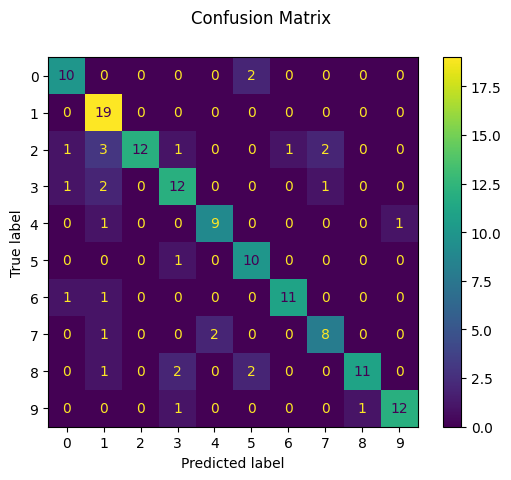

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay

# Generate a confusion matrix from the true test labels (y_test) and the predicted labels (Y_pred)
disp = ConfusionMatrixDisplay.from_predictions(y_test, Y_pred)

# Set the title of the confusion matrix figure to 'Confusion Matrix'
disp.figure_.suptitle('Confusion Matrix');

# Radius Neighbors Classifier

The Radius Neighbors Classifier is a supervised machine learning algorithm utilized for classification tasks, akin to the K-Nearest Neighbors (KNN) algorithm. Its distinct feature is its reliance on a fixed radius to encompass training data points around a new data point, rather than a set number of nearest neighbors.

This classifier operates by first establishing a radius, which sets the scope of the neighborhood for the new data point. It then identifies all training points within this radius. The classification of the new point is deduced from a majority vote of the classes within the radius.

A key advantage of the Radius Neighbors Classifier is its effectiveness in scenarios where training data exhibits non-uniform density and requires a variable number of neighbors. However, similar to KNN, it faces challenges of computational intensity in handling large datasets.

In [9]:
from sklearn.neighbors import RadiusNeighborsClassifier

# Initialize the Radius Neighbors classifier
classifier_2 = RadiusNeighborsClassifier(radius=1600, outlier_label='most_frequent')

# Train the classifier
classifier_2.fit(X_train, y_train)

# Use the trained classifier to predict the classes for the test dataset
Y_pred = classifier_2.predict(X_test)

# Print a detailed classification report
print(classification_report(y_test, Y_pred, digits=3, output_dict=False))

              precision    recall  f1-score   support

           0      0.857     0.500     0.632        12
           1      0.704     1.000     0.826        19
           2      1.000     0.300     0.462        20
           3      0.909     0.625     0.741        16
           4      0.900     0.818     0.857        11
           5      0.875     0.636     0.737        11
           6      1.000     0.769     0.870        13
           7      0.208     0.909     0.339        11
           8      1.000     0.312     0.476        16
           9      1.000     0.786     0.880        14

    accuracy                          0.650       143
   macro avg      0.845     0.666     0.682       143
weighted avg      0.860     0.650     0.677       143

